In [1]:
import pandas as pd

df = pd.read_csv("Task_6.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [2]:
print(df.isna().sum())

df.info()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB

In [3]:
df.fillna(0, inplace = True)

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [4]:
df['Catagory'] = df['listed_in'].str.split(',').apply(len)

In [5]:
print(df[['listed_in', 'Catagory']].head())

                              listed_in  Catagory
0                           Documentary         1
1                 Comedy, Fantasy, Kids         3
2         Coming of Age, Drama, Romance         3
3  Animals & Nature, Docuseries, Family         3
4     Action-Adventure, Animation, Kids         3


In [6]:
print(df['Catagory'].describe())

count    1368.000000
mean        2.714181
std         0.532241
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Catagory, dtype: float64


In [7]:
df[['Category_1', 'Category_2', 'Category_3']] = df['listed_in'].str.split(',', expand=True)

In [8]:
df.drop(['show_id', 'description', 'listed_in'], axis = 1, inplace = True)

In [9]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,Catagory,Category_1,Category_2,Category_3
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",0,"September 24, 2021",2021,TV-PG,88 min,1,Documentary,None,None
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,3,Comedy,Fantasy,Kids
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,3,Coming of Age,Drama,Romance
3,TV Show,Dog: Impossible,0,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,3,Animals & Nature,Docuseries,Family
4,TV Show,Spidey And His Amazing Friends,0,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,3,Action-Adventure,Animation,Kids


In [10]:
if df.duplicated().sum() > 0:
    print(f"Found {df.duplicated().sum()} duplicate rows.")
    df.drop_duplicates(inplace=True)
    print("Duplicates have been removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Which year of 20s released more numbers of Movies/TV Shows?

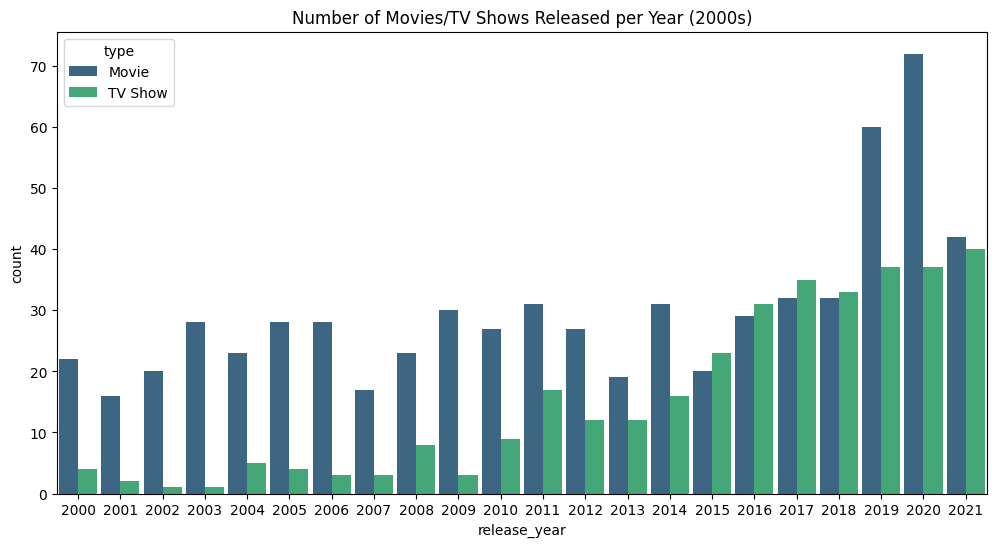

In [12]:
var_1 = df.query('release_year >= 2000')

plt.figure(figsize=(12, 6))
sns.countplot(data=var_1, x='release_year', palette= 'viridis', hue= 'type', width= 0.9)
plt.title('Number of Movies/TV Shows Released per Year (2000s)')
plt.grid(False)
plt.show()

Show the difference in Movies released and TV Shows released of top 3 year of 20s having the most released


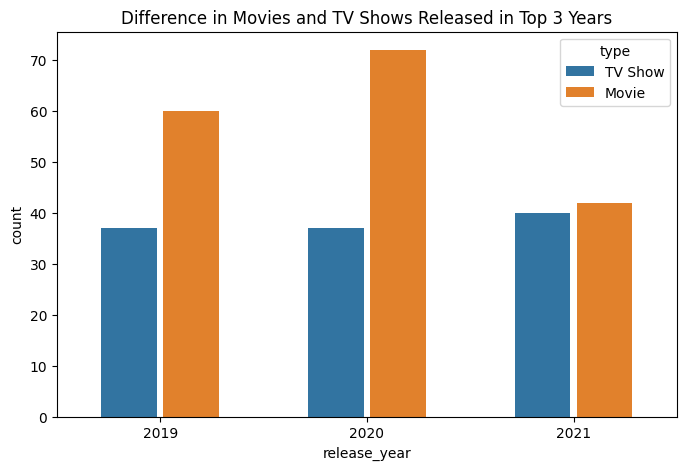

In [13]:
top_years = var_1['release_year'].value_counts().nlargest(3).index
var_2 = df[df['release_year'].isin(top_years)]

plt.figure(figsize=(8, 5))
sns.countplot(data=var_2, x='release_year', hue='type', width=0.6, gap=0.1)
plt.title('Difference in Movies and TV Shows Released in Top 3 Years')
plt.grid(False)
plt.show()

What are the total number of movies and tv shows released?

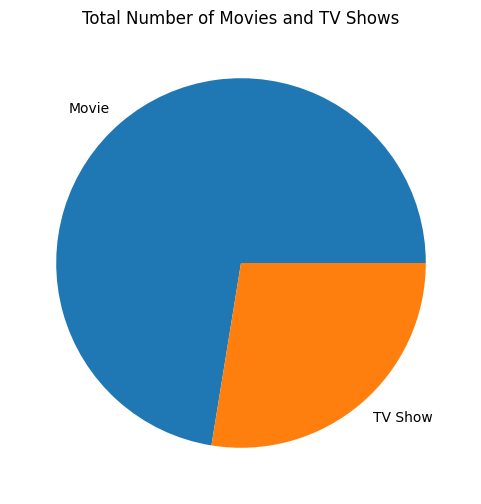

In [14]:
var_3 = df['type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(var_3, labels=var_3.index)
plt.title('Total Number of Movies and TV Shows')
plt.show()

Which year of 20s has released the most Action-Adventure movies/tv shows?

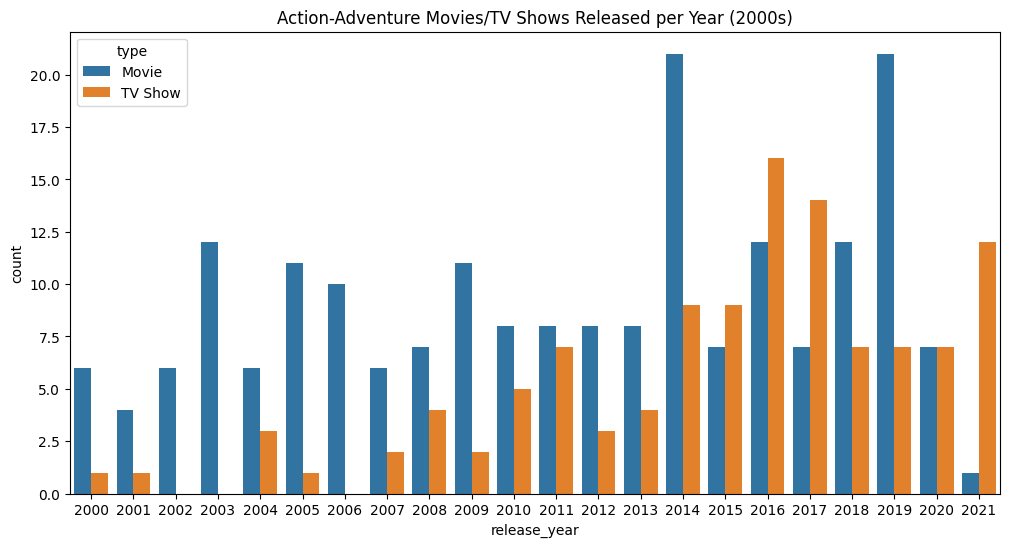

In [15]:
var_4 = df.query("release_year >= 2000 and (Category_1 == 'Action-Adventure' or Category_2 == 'Action-Adventure' or Category_3 == 'Action-Adventure')")
plt.figure(figsize=(12, 6))
sns.countplot(data=var_4, x='release_year', hue= 'type')
plt.title('Action-Adventure Movies/TV Shows Released per Year (2000s)')
plt.grid(False)
plt.show()

Which category of rating has the most number of releases?

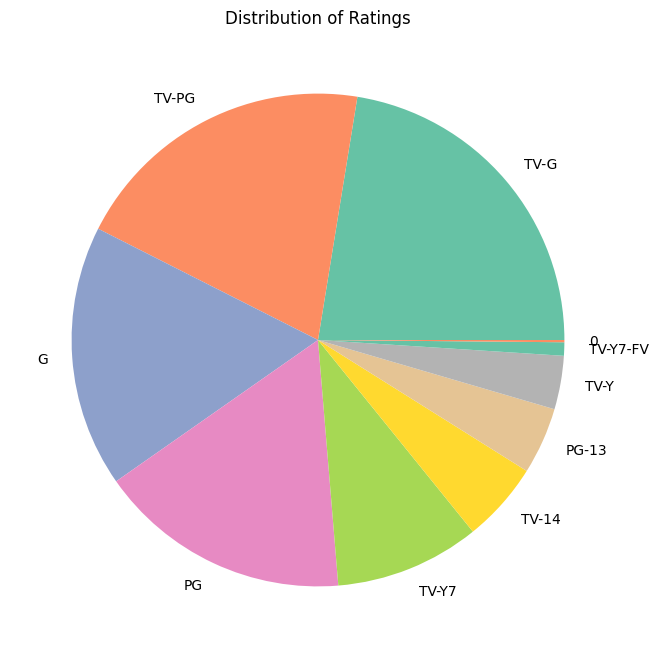

In [16]:
var_5 = df['rating'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(var_5, labels=var_5.index, colors=sns.color_palette('Set2'))
plt.title('Distribution of Ratings')
plt.show()

Which category is the most frequently released in the 2000s?

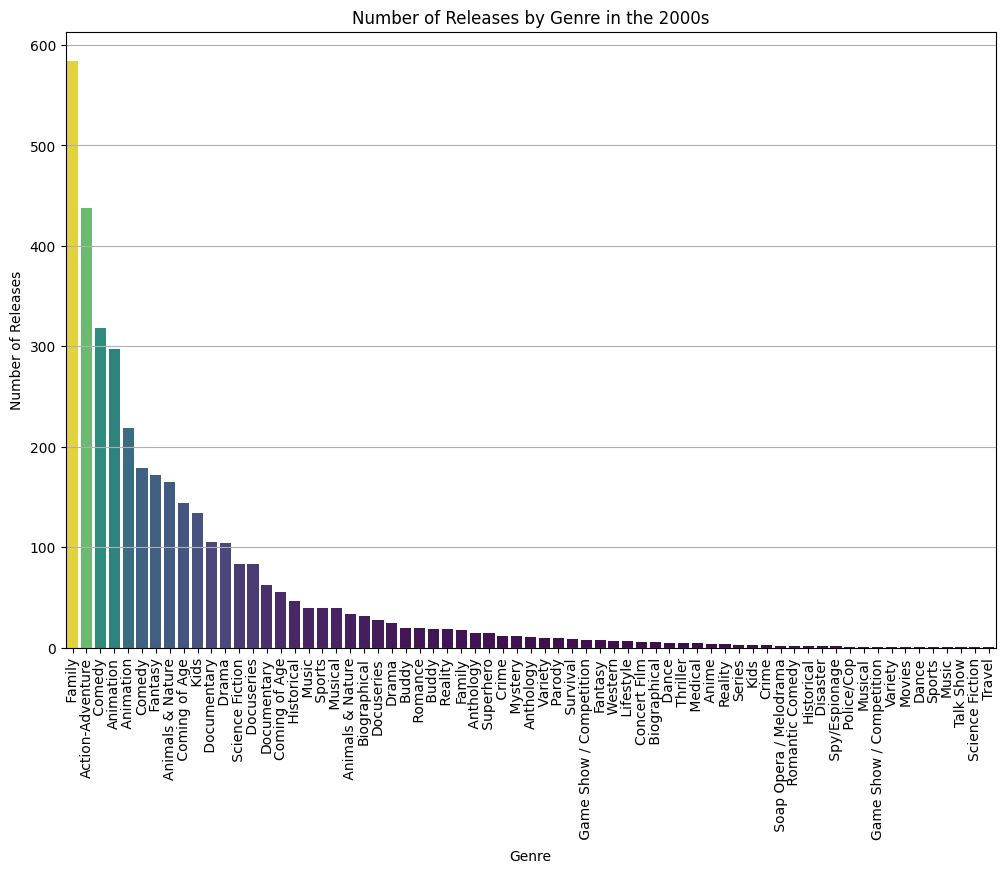

In [17]:
genre_counts = pd.concat([
    df['Category_1'].dropna(),
    df['Category_2'].dropna(),
    df['Category_3'].dropna()
]).value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis', hue= genre_counts, legend= False)
plt.title('Number of Releases by Genre in the 2000s')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Releases')
plt.grid(axis='y')
plt.show()

What is the trend of average ratings over the years for movies and TV shows?

<Figure size 1400x700 with 0 Axes>

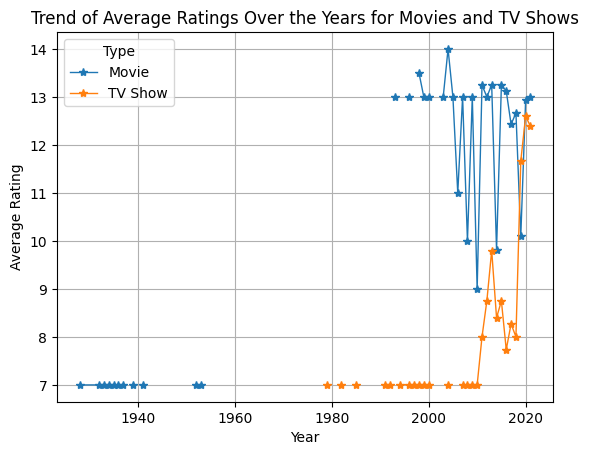

In [18]:
df['rating'] = pd.to_numeric(df['rating'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
var_6 = df.groupby(['release_year', 'type'])['rating'].mean().unstack()

plt.figure(figsize=(14, 7))
var_6.plot(kind='line', marker='*', linewidth=1)
plt.title('Trend of Average Ratings Over the Years for Movies and TV Shows')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Type')
plt.grid(True)
plt.show()